In [4]:
from main import *


(1,) * (1,) = 1 []
(1,) * (1,) = 0 []
I (0, 1, 2, 3)


In [9]:
import matplotlib.pyplot as plt
from typing import Optional
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

e0 = e(0)
e1 = e(1)
e2 = e(2)
O = e0.dual()

def coords(m: Multivector2) -> tuple[float, float, float]:
    m = m.undual()
    scale = m.data[to_ix((0,))[1]]
    x = m.data[to_ix((1,))[1]]/scale
    y = m.data[to_ix((2,))[1]]/scale
    z = m.data[to_ix((3,))[1]]/scale
    return x, y, z
Label = Optional[str]
points : list[tuple[float, float, float, Label]] = []
lines : list[tuple[tuple[float, float], tuple[float, float], tuple[float, float]]] = []
polys : list[list[tuple[float, float, float]]] = []
def draw_point(m: Multivector2, label: Label = None):
    x, y, z = coords(m)
    points.append((x, y, z, label))

X_RANGE = (-3, 3)
Y_RANGE = (-10, 10)
def draw_line(m: Multivector2, label: Optional[str]=None):
    min = e1 + X_RANGE[0] * e0
    max = e1 + X_RANGE[1] * e0
    A = min ^ m
    B = max ^ m
    x1, y1, z1 = coords(A)
    x2, y2, z2 = coords(B)
    lines.append(((x1, x2), (y1, y2), (z1, z2)))

def draw_poly(ms: list[Multivector2], label: Optional[str]=None):
    points2 = []
    for m in ms:
        x, y, z = coords(m)
        points2.append((x, y, z))
    polys.append(points2)

def show():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    z = [p[2] for p in points]
    ax.scatter(x, y, z)
    for l in lines:
        ax.plot(*l)
    for points2 in polys:
        points2 = [[list(elem) for elem in points2]]
        print(points2)
        print(np.shape(points2))
        tmp = Poly3DCollection(points2)
        ax.add_collection3d(tmp)
    # points = []
    # polys = []
    fig.show()

[[[-1.0, -1.0, 0.0], [-1.0, 1.0, 0.0], [1.0, 1.0, 0.0]]]
(1, 3, 3)


/tmp/ipykernel_32809/1880230696.py:60: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


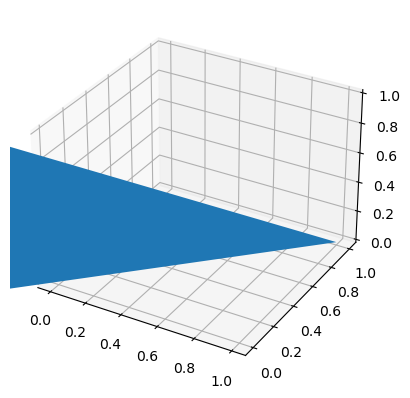

In [10]:
A = (-1*e1 - 1*e2 + e0).dual()
B = (-1*e1 + 1*e2 + e0).dual()
C = (1*e1 + 1*e2 + e0).dual()
draw_poly([A, B, C])
show()

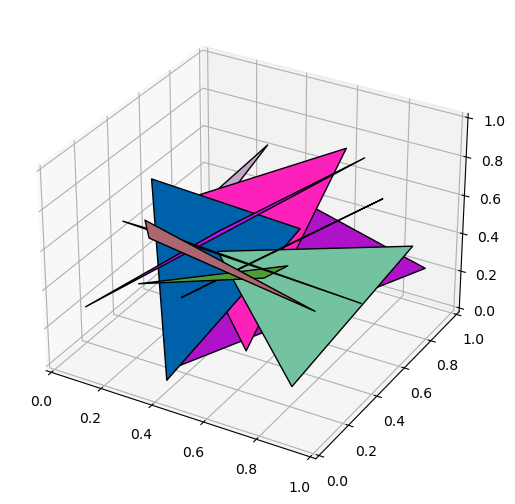

In [3]:
import mpl_toolkits.mplot3d as a3
import matplotlib.colors as colors
import pylab as pl
import numpy as np


fig = pl.figure()
ax = a3.Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
for i in range(10):
    vtx = np.random.rand(3,3)
    tri = a3.art3d.Poly3DCollection([vtx])
    tri.set_color(colors.rgb2hex(np.random.rand(3)))
    tri.set_edgecolor('k')
    ax.add_collection3d(tri)
pl.show()

[[[-1.0, -1.0, 0.0], [-1.0, 1.0, 0.0], [1.0, 1.0, 0.0]]]
(1, 3, 3)
[[[-1.0, -1.0, 0.0], [-1.0, 1.0, 0.0], [1.0, 1.0, 0.0]]]
(1, 3, 3)


/tmp/ipykernel_32809/1880230696.py:60: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


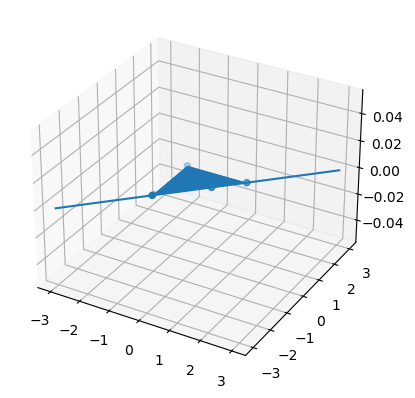

In [11]:
A = (-1*e1 - 1*e2 + e0).dual()
B = (-1*e1 + 1*e2 + e0).dual()
C = (1*e1 + 1*e2 + e0).dual()
draw_point(A, 'A')
draw_point(B, 'B')
draw_point(C, 'C')
draw_poly([A, B, C])

L = 1*e1 + 1*e2 -0.5*e0
# draw_line(L) this is a plane

M = C & A
draw_line(M)

D = L ^ M
draw_point(D)

show()


-6.0e01 + 6.0e02 + -2.0e12
-6.0e01 + -6.0e02 + 2.0e12
-10.0e01 + 6.0e02 + -2.0e12


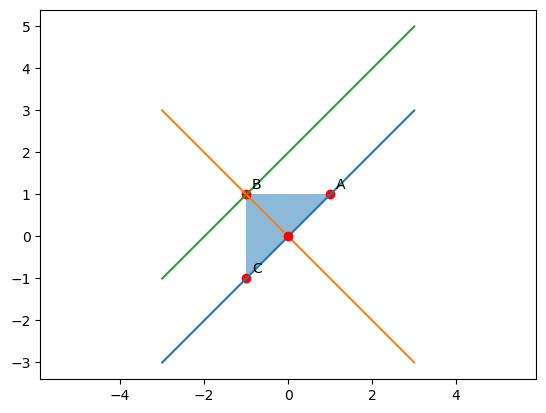

In [5]:
plt.axis('equal')

A = (1*e1 + 1*e2 + e0).dual()
B = (-1*e1 + 1*e2 + e0).dual()
C = (-1*e1 - 1*e2 + e0).dual()
draw_point(A, 'A')
draw_point(B, 'B')
draw_point(C, 'C')
draw_poly([A, B, C])

AC = A & C
draw_line(A & C)

draw_line(AC | B)
draw_line((AC | B) / B)
#  | operator is left contraction, so i need a slighly different formula
draw_point(AC.inv() * (AC | B))

-6.0e01 + 6.0e02 + -2.0e12
-2.0e01 + -6.0e02 + 2.0e12
-10.0e01 + 6.0e02 + -2.0e12


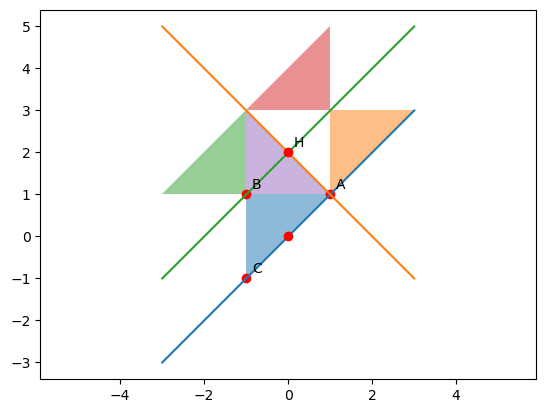

In [6]:
plt.axis('equal')

A = (1*e1 + 1*e2 + e0).dual()
B = (-1*e1 + 1*e2 + e0).dual()
C = (-1*e1 - 1*e2 + e0).dual()
draw_point(A, 'A')
draw_point(B, 'B')
draw_point(C, 'C')
draw_poly([A, B, C])

L = A & C
draw_line(L, 'L')

draw_line(L | A)

# project L on B
draw_line((L | B) / B)

# project B on L
draw_point(L.inv() * (L | B))

p = L | A
draw_poly([-1*p*X/p for X in [A, B, C]])

q = (L | B) / B
draw_poly([-1*q*X/q for X in [A, B, C]])

H = q ^ (L | A)
draw_point(H, 'H')
draw_poly([-1*H*X/H for X in [A, B, C]])


R = (B & A)/(B & L.inv() * (L | B))
draw_poly([R*X/R for X in [A, B, C]])

14.0e01 + -12.0e02 + 4.0e12


TypeError: exp() missing 1 required positional argument: 'B'

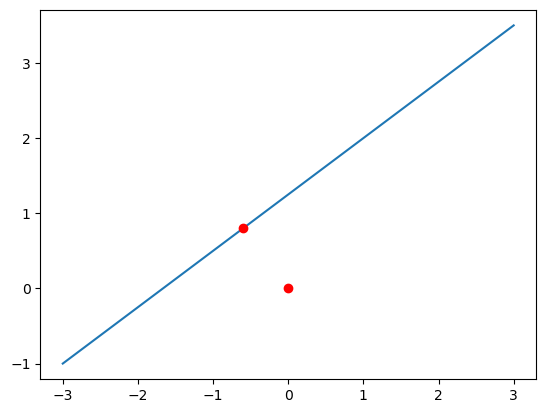

In [7]:
plt.axis('equal')


p = -3*e1 + 4*e2 - 5*e0
draw_line(p)
draw_point(O)
# how do i find the endpoints of a line?
label_pos = p.inv() * (p | O) 
draw_point(label_pos)
M = exp(3*p.normalize())
P1 = M * label_pos / M
P2 = M.inv() * label_pos * M